🔹 Logistic Regression Metrics:
Accuracy: 0.7532467532467533
Precision: 0.6666666666666666
Recall: 0.6181818181818182
F1 Score: 0.6415094339622642

🔹 Random Forest Metrics:
Accuracy: 0.7402597402597403
Precision: 0.631578947368421
Recall: 0.6545454545454545
F1 Score: 0.6428571428571428


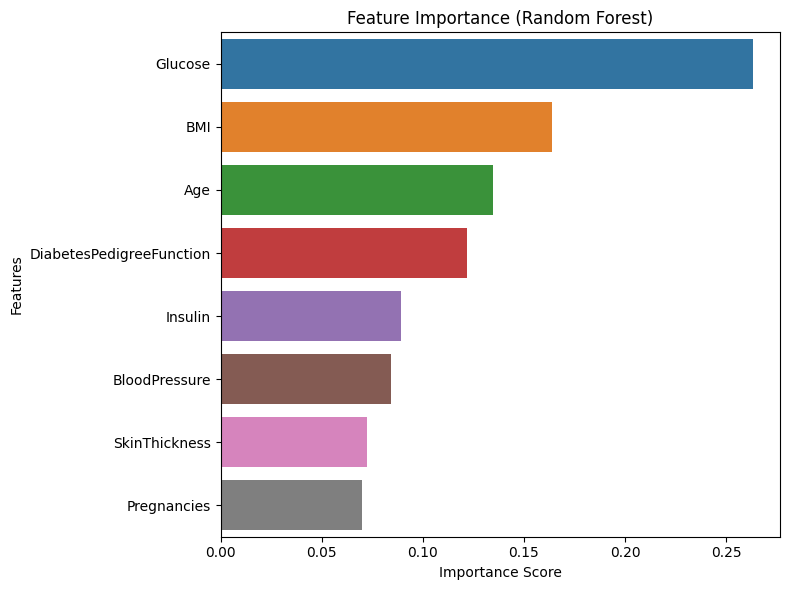


🔍 Best Random Forest Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
📊 Tuned RF Accuracy: 0.7532467532467533


In [1]:
# 📦 One-Cell Complete ML Pipeline for Diabetes Prediction

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')

# Replace 0s with NaN in columns where 0 is not valid
invalid_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[invalid_cols] = df[invalid_cols].replace(0, np.nan)
df.fillna(df.median(), inplace=True)

# Split features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)

# Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluate both models
print("🔹 Logistic Regression Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Precision:", precision_score(y_test, y_pred_log))
print("Recall:", recall_score(y_test, y_pred_log))
print("F1 Score:", f1_score(y_test, y_pred_log))

print("\n🔹 Random Forest Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))

# Feature importance from Random Forest
feat_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8, 6))
sns.barplot(x=feat_importances.values, y=feat_importances.index)
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

# Bonus: Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [4, 6, None],
    'min_samples_split': [2, 5]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
best_pred = best_model.predict(X_test)

print("\n🔍 Best Random Forest Params:", grid_search.best_params_)
print("📊 Tuned RF Accuracy:", accuracy_score(y_test, best_pred))
